This notebook will be collected automatically at **6pm on Monday** from `/home/data_scientist/assignments/Week10` directory on the course JupyterHub server. If you work on this assignment on the course Jupyterhub server, just make sure that you save your work and instructors will pull your notebooks automatically after the deadline. If you work on this assignment locally, the only way to submit assignments is via Jupyterhub, and you have to place the notebook file in the correct directory with the correct file name before the deadline.

1. Make sure everything runs as expected. First, restart the kernel (in the menubar, select `Kernel` → `Restart`) and then run all cells (in the menubar, select `Cell` → `Run All`).
2. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed by the autograder.
3. Do not change the file path or the file name of this notebook.
4. Make sure that you save your work (in the menubar, select `File` → `Save and CheckPoint`)

# Problem 10.1. Graph Concepts.



In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_is_instance, assert_true
from numpy.testing import assert_array_equal, assert_array_almost_equal

## Directed graph

- Make a directed graph with 20 integer nodes, and edges connecting every even integer node to the next odd integer node. Start from zero (Zero is an even number).

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/digraph.png)

In [2]:
def get_circular_dg():
    '''
    Creates a directed graph with 20 integer nodes.
    Every even interger node is connected to the next odd integer node.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.Digraph instance.
    '''
    
    # YOUR CODE HERE
    dg = nx.DiGraph()
    dg.add_nodes_from(range(20))
    dg.add_weighted_edges_from([(2*idx, 2*idx + 1, 10) for idx in range(10)])
    
    return dg

In [3]:
dg = get_circular_dg()

In [4]:
assert_is_instance(dg, nx.DiGraph)

nodes = np.array(dg.nodes())
assert_equal(nodes.size, 20)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 19)
assert_true(np.all(np.diff(nodes) == 1))

edges = np.array(dg.edges())
assert_equal(edges.shape[0], 10)
assert_equal(edges.shape[1], 2)
assert_equal(edges[:, 0].min(), 0)
assert_equal(edges[:, 0].max(), 18)
assert_true(np.all(np.diff(edges[:, 0]) == 2))
assert_equal(edges[:, 1].min(), 1)
assert_equal(edges[:, 1].max(), 19)
assert_true(np.all(np.diff(edges[:, 1]) == 2))

- Draw the directed graph created with `get_circular_dg()`. Note that our function returns a Matplotlib axes instance. You should probably use the `ax` parameter in [NetworkX's drawing function](https://networkx.github.io/documentation/latest/reference/drawing.html).

In [5]:
def draw_circular_dg(dg):
    '''
    Draws a directed graph.
    
    Paramters
    ---------
    dg: A networkx.DiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_circular(dg, with_labels=True)
    
    return ax

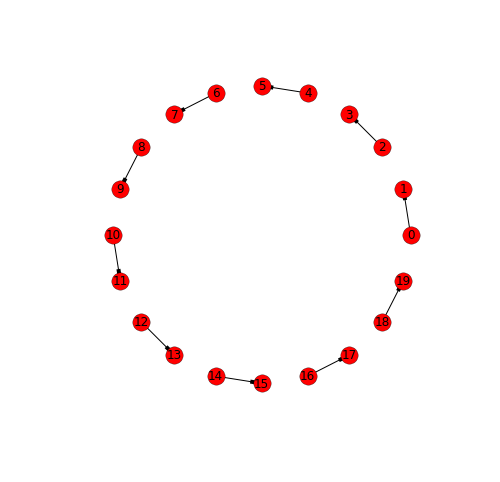

In [6]:
ax1 = draw_circular_dg(dg)
plt.show()

In [7]:
pos = np.array(list(nx.circular_layout(dg).values()))
assert_is_instance(ax1, mpl.axes.Axes)
assert_array_almost_equal(ax1.collections[0].get_offsets(), pos)
for idx, seg in enumerate(ax1.collections[1].get_segments()):
    line = np.vstack((pos[idx * 2], pos[idx * 2 + 1]))
    assert_array_almost_equal(seg, line)
assert_equal(len(ax1.collections[2].get_segments()), 10)

## Multigraph

- Create an undirected multigraph with five nodes.

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/multigraph_nodes.png)

In [8]:
def get_multigraph():
    '''
    Creates an undirected multigraph with five nodes.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.MultiGraph instance.
    '''
    
    # YOUR CODE HERE
    mg = nx.MultiGraph()
    mg.add_nodes_from(range(5))
    
    return mg

In [9]:
mg0 = get_multigraph()

In [10]:
assert_is_instance(mg0, nx.MultiGraph)

nodes = np.array(mg0.nodes())
assert_equal(nodes.size, 5)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 4)
assert_true(np.all(np.diff(nodes) == 1))

assert_equal(len(mg0.edges()), 0)

- Draw the multigraph in circular format. Don't forget to use the `ax` parameter in NetworkX's drawing function.

In [11]:
def draw_multigraph(mg):
    '''
    Draws a multigraph in circular format.
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_circular(mg, with_labels=True)
    
    return ax

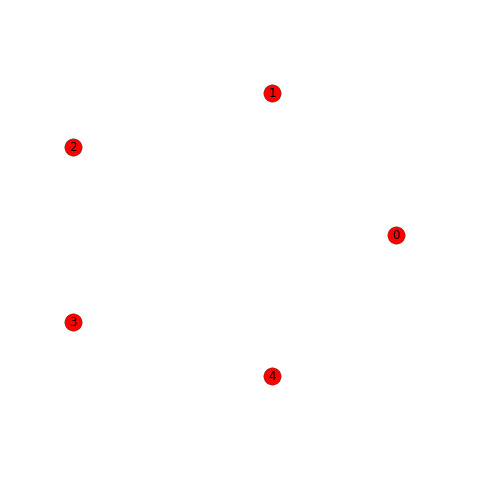

In [12]:
ax2 = draw_multigraph(mg0)
plt.show()

In [13]:
pos = np.array(list(nx.circular_layout(mg0).values()))
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(len(ax2.collections), 1)
assert_equal(len(ax2.collections[0].get_offsets()), len(mg0.nodes()))

## Add edges

- Add new edges between all even integer nodes (0, 2, 4) and between all odd integer nodes (1, 3). 

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week10/assignments/images/multigraph_all.png)

In [14]:
def add_edges(mg):
    '''
    Adds new edges between all even integer nodes (0, 2, 4)
    and between all odd integer nodes (1, 3).
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    mg.add_edges_from([(0, 2), (0, 4), (2, 4)])
    mg.add_edges_from([(1, 3)])
    
    return mg

In [15]:
mg1 = add_edges(mg0)

In [16]:
assert_is_instance(mg1, nx.MultiGraph)

nodes = np.array(mg1.nodes())
assert_array_equal(mg1.nodes(), mg0.nodes())

edges = np.array(mg1.edges())
assert_equal(edges.shape[0], 4)
assert_equal(edges.shape[1], 2)
assert_true(np.all((edges[:, 1] - edges[:, 0]) % 2 == 0))

In the following code cell, we reuse `draw_multigraph()` from earlier to draw the new multigraph.

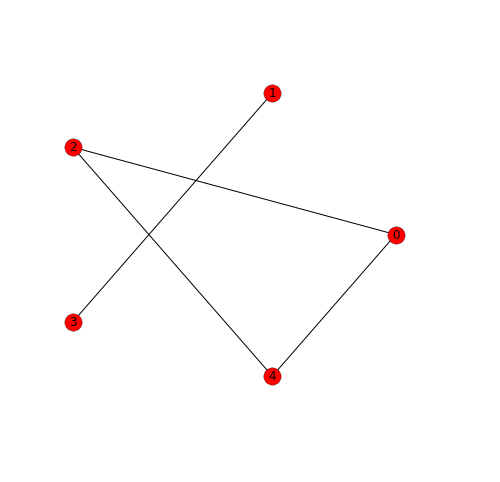

In [17]:
ax3 = draw_multigraph(mg1)
plt.show()

In [18]:
pos = np.array(list(nx.circular_layout(mg1).values()))
assert_is_instance(ax3, mpl.axes.Axes)
assert_equal(len(ax3.collections), 2) # 1 for nodes, 1 for edges
assert_array_almost_equal(ax3.collections[0].get_offsets(), pos)
assert_equal(len(ax3.collections[1].get_segments()), len(mg1.edges()))